In [33]:
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
trem_list = pd.read_pickle('../data/tremor/aghosh.pkl')

In [3]:
tremors = trem_list[0]
tremors.head()

,Year,Month,Day,Hour,Minute,Latitude,Longitude,Depth,errLat,errLon,errDepth
0,2009,6,20,1,26,48.232500,-123.065000,28.000000,10.423439,7.125217,17.262677
1,2009,6,20,1,28,48.172500,-123.050000,23.750000,2.451065,1.355398,3.774917
2,2009,6,20,9,20,48.453333,-123.066667,55.000000,9.907575,2.795187,7.000000
3,2009,6,20,21,3,48.403333,-123.726667,53.333333,8.934842,11.118311,31.659648
4,2009,6,21,0,42,48.030000,-122.875000,21.000000,4.328503,7.153370,12.909944


In [4]:
timestamp = pd.to_datetime(tremors[['Year', 'Month', 'Day', 'Hour', 'Minute']])
type(timestamp)

pandas.core.series.Series

In [5]:
ts = timestamp.to_frame(name='Time')
type(ts)

pandas.core.frame.DataFrame

In [6]:
cleanup = tremors.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1)
cleanup.head()

,Latitude,Longitude,Depth,errLat,errLon,errDepth
0,48.232500,-123.065000,28.000000,10.423439,7.125217,17.262677
1,48.172500,-123.050000,23.750000,2.451065,1.355398,3.774917
2,48.453333,-123.066667,55.000000,9.907575,2.795187,7.000000
3,48.403333,-123.726667,53.333333,8.934842,11.118311,31.659648
4,48.030000,-122.875000,21.000000,4.328503,7.153370,12.909944


In [7]:
timed_tremors = pd.concat([ts, cleanup], axis=1)
timed_tremors.head()

,Time,Latitude,Longitude,Depth,errLat,errLon,errDepth
0,2009-06-20 01:26:00,48.232500,-123.065000,28.000000,10.423439,7.125217,17.262677
1,2009-06-20 01:28:00,48.172500,-123.050000,23.750000,2.451065,1.355398,3.774917
2,2009-06-20 09:20:00,48.453333,-123.066667,55.000000,9.907575,2.795187,7.000000
3,2009-06-20 21:03:00,48.403333,-123.726667,53.333333,8.934842,11.118311,31.659648
4,2009-06-21 00:42:00,48.030000,-122.875000,21.000000,4.328503,7.153370,12.909944


In [8]:
timed_tremors.to_pickle("reducedDF.pkl")

In [10]:
test = pd.read_csv('../data/geodata/slab_contours.csv')

In [11]:
test.head()

,X,Y,Depth_km
0,-127.357345,48.914691,-5
1,-126.910226,48.531907,-5
2,-126.639075,48.260043,-5
3,-126.479377,48.065906,-5
4,-126.374462,47.869924,-5


In [16]:
test2 = test.loc[test['Depth_km'] == -5]

In [19]:
test3 = test2.drop(['Depth_km'], axis=1)
test3.head()

,X,Y
0,-127.357345,48.914691
1,-126.910226,48.531907
2,-126.639075,48.260043
3,-126.479377,48.065906
4,-126.374462,47.869924


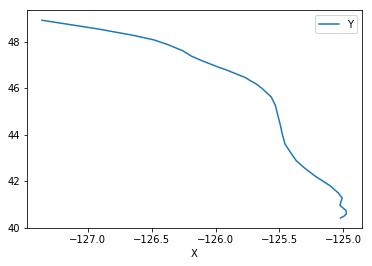

In [21]:
test3.plot.line(x='X', y='Y')

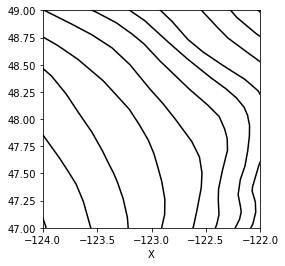

In [38]:
ax = plt.gca()
plt.xlim(-124, -122)
plt.ylim(47, 49)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()
for i in test.Depth_km.unique():
    test2 = test.loc[test['Depth_km'] == i]
    test3 = test2.drop(['Depth_km'], axis=1)
    ax = test3.plot.line(x='X', y='Y',ax=ax,legend=False,color='k')